# 1) BUSINESS UNDERSTANDING

+ Recently, a comedy-action-thriller movie lost £400K at the box office. So, it's a huge loss for Sussex Budget Productions. Now the production company is looking for good profits, and the CEO is also looking for good creative movies. The goal is to raise £1.5 million from investors while ensuring a high return on investment (ROI). Based on the IMDB score in the movies, metadata needs to be analyzed and a good gilm needs to be recommended for next film production.

# 2) DATA COLLECTION

In [1]:
# Import Necessary Libraries:- 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

import warnings
warnings.filterwarnings('ignore')

In [2]:
movie_data = pd.read_csv('movie_metadata.csv') # Reading the data
movie_data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660


In [3]:
movie_data.head() # top 5 records of our dataset

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
movie_data.tail() # bottom 5 records of our dataset

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
5038,Color,Scott Smith,1.0,87.0,2.0,318.0,Daphne Zuniga,637.0,NaN,Comedy|Drama,...,6.0,English,Canada,NaN,NaN,2013.0,470.0,7.7,NaN,84
5039,Color,NaN,43.0,43.0,NaN,319.0,Valorie Curry,841.0,NaN,Crime|Drama|Mystery|Thriller,...,359.0,English,USA,TV-14,NaN,NaN,593.0,7.5,16.00,32000
5040,Color,Benjamin Roberds,13.0,76.0,0.0,0.0,Maxwell Moody,0.0,NaN,Drama|Horror|Thriller,...,3.0,English,USA,NaN,1400.0,2013.0,0.0,6.3,NaN,16
5041,Color,Daniel Hsia,14.0,100.0,0.0,489.0,Daniel Henney,946.0,10443.0,Comedy|Drama|Romance,...,9.0,English,USA,PG-13,NaN,2012.0,719.0,6.3,2.35,660
5042,Color,Jon Gunn,43.0,90.0,16.0,16.0,Brian Herzlinger,86.0,85222.0,Documentary,...,84.0,English,USA,PG,1100.0,2004.0,23.0,6.6,1.85,456


In [5]:
#pd.set_option('display.max_columns', None) # displaying all the columns in our dataset
#pd.set_option('display.max_rows', None) # displaying all the rows in our dataset 
#movie_data

+ I have read the movie metadata by importing some necessary libraries.

# 3) DATA UNDERSTANDING 

### 3.1) Initial Analysis:-

In [6]:
movie_data.shape 

(5043, 28)

In [7]:
movie_data.columns # Displaying the all columns name

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [8]:
movie_data.dtypes # Checking our features in which type of data.

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [9]:
movie_data.isnull().sum() # Counting all missed values 

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      14
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [10]:
movie_data.duplicated().sum()

45

In [11]:
movie_data.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [12]:
movie_data.describe(include = 'all') # Getting to know the descriptive statistics of our data

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,5024,4939,4993.000000,5028.000000,4939.000000,5020.000000,5030,5036.000000,4.159000e+03,5043,...,5022.000000,5029,5038,4740,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
unique,2,2398,NaN,NaN,NaN,NaN,3032,NaN,NaN,914,...,NaN,46,65,18,NaN,NaN,NaN,NaN,NaN,NaN
top,Color,Steven Spielberg,NaN,NaN,NaN,NaN,Morgan Freeman,NaN,NaN,Drama,...,NaN,English,USA,R,NaN,NaN,NaN,NaN,NaN,NaN
freq,4815,26,NaN,NaN,NaN,NaN,20,NaN,NaN,236,...,NaN,4704,3807,2118,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,140.194272,107.201074,686.509212,645.009761,NaN,6560.047061,4.846841e+07,NaN,...,272.770808,NaN,NaN,NaN,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,NaN,NaN,121.601675,25.197441,2813.328607,1665.041728,NaN,15020.759120,6.845299e+07,NaN,...,377.982886,NaN,NaN,NaN,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,NaN,NaN,1.000000,7.000000,0.000000,0.000000,NaN,0.000000,1.620000e+02,NaN,...,1.000000,NaN,NaN,NaN,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,NaN,NaN,50.000000,93.000000,7.000000,133.000000,NaN,614.000000,5.340988e+06,NaN,...,65.000000,NaN,NaN,NaN,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,NaN,NaN,110.000000,103.000000,49.000000,371.500000,NaN,988.000000,2.551750e+07,NaN,...,156.000000,NaN,NaN,NaN,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,NaN,NaN,195.000000,118.000000,194.500000,636.000000,NaN,11000.000000,6.230944e+07,NaN,...,326.000000,NaN,NaN,NaN,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000


In [13]:
movie_data['color'].value_counts().sort_values(ascending = False) # counting the frequency values which is occured in a particular feature

color
Color               4815
 Black and White     209
Name: count, dtype: int64

In [14]:
movie_data['director_name'].value_counts().sort_values(ascending = False)

director_name
Steven Spielberg    26
Woody Allen         22
Clint Eastwood      20
Martin Scorsese     20
Ridley Scott        17
                    ..
Ryan Smith           1
Travis Romero        1
Andrew Haigh         1
Cary Bell            1
Daniel Hsia          1
Name: count, Length: 2398, dtype: int64

In [15]:
movie_data['actor_1_name'].value_counts().sort_values(ascending = False)

actor_1_name
Robert De Niro    49
Johnny Depp       41
Nicolas Cage      33
J.K. Simmons      31
Bruce Willis      30
                  ..
Marilyn Rising     1
Temple Grandin     1
Alan Brent         1
Joel Moody         1
John August        1
Name: count, Length: 2097, dtype: int64

In [16]:
movie_data['actor_2_name'].value_counts().sort_values(ascending = False)

actor_2_name
Morgan Freeman      20
Charlize Theron     15
Brad Pitt           14
James Franco        11
Meryl Streep        11
                    ..
Joanne Whalley       1
Whitney Able         1
Amber Benson         1
Louis Mustillo       1
Brian Herzlinger     1
Name: count, Length: 3032, dtype: int64

In [17]:
movie_data['actor_3_name'].value_counts().sort_values(ascending = False)

actor_3_name
John Heard               8
Ben Mendelsohn           8
Steve Coogan             8
Jon Gries                7
Kirsten Dunst            7
                        ..
Elaine Bromka            1
Nils-Anders Vallgårda    1
Alan Pietruszewski       1
Amy Hargreaves           1
Jon Gunn                 1
Name: count, Length: 3521, dtype: int64

In [18]:
movie_data['genres'].value_counts().sort_values(ascending = False)

genres
Drama                                     236
Comedy                                    209
Comedy|Drama                              191
Comedy|Drama|Romance                      187
Comedy|Romance                            158
                                         ... 
Comedy|Crime|Drama|Mystery|Thriller         1
Biography|Crime|Drama|Romance|Thriller      1
Comedy|Music|Sci-Fi                         1
Adventure|Drama|Family|Romance|Western      1
Comedy|Crime|Horror                         1
Name: count, Length: 914, dtype: int64

+ In the above analysis, I gained knowledge of the descriptive statistics of the data. It tells me about shape, dtypes, mean, std, value counts, and all, which is very useful for me to understand how my data is present.

# 4) DATA CLEANING

In [19]:
# Removing the Null values in the following features
movie_data.dropna(subset = ['gross','budget','actor_1_name','actor_2_name','actor_3_name'], inplace = True) 

In [20]:
movie_data.isnull().sum() 

color                         2
director_name                 0
num_critic_for_reviews        1
duration                      1
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  0
facenumber_in_poster          6
plot_keywords                30
movie_imdb_link               0
num_user_for_reviews          0
language                      4
country                       0
content_rating               47
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                 73
movie_facebook_likes          0
dtype: int64

In [21]:
movie_data.shape

(3881, 28)

In [22]:
movie_data['content_rating']=movie_data['content_rating'].fillna('R')
movie_data['duration'] = movie_data['duration'].fillna(movie_data['duration'].mean())
movie_data['num_critic_for_reviews'] = movie_data['num_critic_for_reviews'].fillna(movie_data['num_critic_for_reviews'].median())

In [23]:
movie_data.isnull().sum()

color                         2
director_name                 0
num_critic_for_reviews        0
duration                      0
director_facebook_likes       0
actor_3_facebook_likes        0
actor_2_name                  0
actor_1_facebook_likes        0
gross                         0
genres                        0
actor_1_name                  0
movie_title                   0
num_voted_users               0
cast_total_facebook_likes     0
actor_3_name                  0
facenumber_in_poster          6
plot_keywords                30
movie_imdb_link               0
num_user_for_reviews          0
language                      4
country                       0
content_rating                0
budget                        0
title_year                    0
actor_2_facebook_likes        0
imdb_score                    0
aspect_ratio                 73
movie_facebook_likes          0
dtype: int64

In [24]:
movie_data.drop_duplicates(inplace = True)

In [25]:
movie_data.duplicated().sum()

0

In [26]:
movie_data['director_facebook_likes'] = movie_data['director_facebook_likes'].astype('int64')
movie_data['actor_3_facebook_likes'] = movie_data['actor_3_facebook_likes'].astype('int64')
movie_data['actor_1_facebook_likes'] = movie_data['actor_1_facebook_likes'].astype('int64')
movie_data['actor_2_facebook_likes'] = movie_data['actor_2_facebook_likes'].astype('int64')
movie_data['num_user_for_reviews'] = movie_data['num_user_for_reviews'].astype('int64')
movie_data['title_year'] = movie_data['title_year'].astype('int64')

In [27]:
movie_data.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes        int64
actor_3_facebook_likes         int64
actor_2_name                  object
actor_1_facebook_likes         int64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews           int64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                     int64
actor_2_facebook_likes         int64
imdb_score                   float64
aspect_ratio                 float64
m

+ I have removed null values of gross, budget, actor1, actor2, actor3 featues because I don't want to duplicate my key feature or else it may effect the data by doing any imputation method. and I filled in the missing values of content rating, duration, and number critic with some imputation because they wouldn't have much effect on the data.

+ I have removed duplicate values as well because I don't want to use repeated records in order to reduce complexity.

+ I performed some analysis on feature data types to get the correct format.

# 5) DATA PREPARATION

In [28]:
movie_data['profit'] = movie_data['gross'] - movie_data['budget']

In [29]:
budget_limit = 1500000
movie_data['budget_level'] = pd.cut(movie_data['budget'], bins=[float('-inf'), budget_limit, float('inf')],
                            labels=['Lower', 'Higher'], right=False)
low_budget_movies = movie_data[movie_data['budget_level'] == 'Lower']
high_budget_movies = movie_data[movie_data['budget_level'] == 'Higher']
movie_data['budget_level'] = movie_data['budget_level'].astype('object')

In [30]:
movie_data['budget_level'].value_counts()

budget_level
Higher    3598
Lower      249
Name: count, dtype: int64

In [31]:
low_budget_movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,budget_level
1281,Color,Martin Scorsese,112.0,112.0,17000,354,David Carradine,22000,32645.0,Crime|Drama|Romance|Thriller,...,USA,R,500000.0,1973,926,7.4,1.85,0,-467355.0,Lower
2242,Black and White,Alfred Hitchcock,290.0,108.0,13000,285,Vera Miles,606,32000000.0,Horror|Mystery|Thriller,...,USA,R,806947.0,1960,332,8.5,1.85,18000,31193053.0,Lower
2420,Color,John Carpenter,212.0,89.0,0,606,Hal Holbrook,2000,21378000.0,Fantasy|Horror,...,USA,R,1000000.0,1980,826,6.8,2.35,7000,20378000.0,Lower
2492,Color,John Carpenter,318.0,101.0,0,598,Donald Pleasence,2000,47000000.0,Horror|Thriller,...,USA,R,300000.0,1978,742,7.9,2.35,12000,46700000.0,Lower
3278,Color,Tobe Hooper,277.0,88.0,365,177,Edwin Neal,383,30859000.0,Horror|Thriller,...,USA,R,83532.0,1974,371,7.5,1.85,0,30775468.0,Lower


In [32]:
high_budget_movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes,profit,budget_level
0,Color,James Cameron,723.0,178.0,0,855,Joel David Moore,1000,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,USA,PG-13,237000000.0,2009,936,7.9,1.78,33000,523505847.0,Higher
1,Color,Gore Verbinski,302.0,169.0,563,1000,Orlando Bloom,40000,309404152.0,Action|Adventure|Fantasy,...,USA,PG-13,300000000.0,2007,5000,7.1,2.35,0,9404152.0,Higher
2,Color,Sam Mendes,602.0,148.0,0,161,Rory Kinnear,11000,200074175.0,Action|Adventure|Thriller,...,UK,PG-13,245000000.0,2015,393,6.8,2.35,85000,-44925825.0,Higher
3,Color,Christopher Nolan,813.0,164.0,22000,23000,Christian Bale,27000,448130642.0,Action|Thriller,...,USA,PG-13,250000000.0,2012,23000,8.5,2.35,164000,198130642.0,Higher
5,Color,Andrew Stanton,462.0,132.0,475,530,Samantha Morton,640,73058679.0,Action|Adventure|Sci-Fi,...,USA,PG-13,263700000.0,2012,632,6.6,2.35,24000,-190641321.0,Higher


In [33]:
movie_data.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes', 'profit',
       'budget_level'],
      dtype='object')

In [34]:
movie_data.drop(columns = ['color','facenumber_in_poster','num_critic_for_reviews','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','plot_keywords','movie_imdb_link','aspect_ratio'],axis = 1, inplace=True)

In [35]:
movie_data.isnull().sum()

director_name              0
duration                   0
director_facebook_likes    0
actor_3_facebook_likes     0
actor_2_name               0
actor_1_facebook_likes     0
gross                      0
genres                     0
actor_1_name               0
movie_title                0
actor_3_name               0
num_user_for_reviews       0
language                   4
country                    0
content_rating             0
budget                     0
title_year                 0
actor_2_facebook_likes     0
imdb_score                 0
movie_facebook_likes       0
profit                     0
budget_level               0
dtype: int64

In [36]:
movie_data.shape

(3847, 22)

In [37]:
movie_data.columns

Index(['director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes', 'profit', 'budget_level'],
      dtype='object')

In [38]:
movie_data.dtypes

director_name               object
duration                   float64
director_facebook_likes      int64
actor_3_facebook_likes       int64
actor_2_name                object
actor_1_facebook_likes       int64
gross                      float64
genres                      object
actor_1_name                object
movie_title                 object
actor_3_name                object
num_user_for_reviews         int64
language                    object
country                     object
content_rating              object
budget                     float64
title_year                   int64
actor_2_facebook_likes       int64
imdb_score                 float64
movie_facebook_likes         int64
profit                     float64
budget_level                object
dtype: object

In [39]:
movie_clean_data= movie_data[['budget_level','duration','genres','language','budget','profit','imdb_score','title_year','country','content_rating','director_name']]

In [40]:
movie_clean_data.shape

(3847, 11)

In [41]:
low_budget_movies = movie_clean_data[movie_clean_data['budget_level'] == 'Lower']
high_budget_movies = movie_clean_data[movie_clean_data['budget_level'] == 'Higher']

In [42]:
movie_clean_data.columns

Index(['budget_level', 'duration', 'genres', 'language', 'budget', 'profit',
       'imdb_score', 'title_year', 'country', 'content_rating',
       'director_name'],
      dtype='object')

In [43]:
movie_data.columns

Index(['director_name', 'duration', 'director_facebook_likes',
       'actor_3_facebook_likes', 'actor_2_name', 'actor_1_facebook_likes',
       'gross', 'genres', 'actor_1_name', 'movie_title', 'actor_3_name',
       'num_user_for_reviews', 'language', 'country', 'content_rating',
       'budget', 'title_year', 'actor_2_facebook_likes', 'imdb_score',
       'movie_facebook_likes', 'profit', 'budget_level'],
      dtype='object')

In [44]:
movie_data.shape

(3847, 22)

In [45]:
low_budget_movies

,budget_level,duration,genres,language,budget,profit,imdb_score,title_year,country,content_rating,director_name
1281,Lower,112.0,Crime|Drama|Romance|Thriller,English,500000.0,-467355.0,7.4,1973,USA,R,Martin Scorsese
2242,Lower,108.0,Horror|Mystery|Thriller,English,806947.0,31193053.0,8.5,1960,USA,R,Alfred Hitchcock
2420,Lower,89.0,Fantasy|Horror,English,1000000.0,20378000.0,6.8,1980,USA,R,John Carpenter
2492,Lower,101.0,Horror|Thriller,English,300000.0,46700000.0,7.9,1978,USA,R,John Carpenter
3278,Lower,88.0,Horror|Thriller,English,83532.0,30775468.0,7.5,1974,USA,R,Tobe Hooper
...,...,...,...,...,...,...,...,...,...,...,...
5033,Lower,77.0,Drama|Sci-Fi|Thriller,English,7000.0,417760.0,7.0,2004,USA,PG-13,Shane Carruth
5034,Lower,80.0,Thriller,English,7000.0,63071.0,6.3,2005,Philippines,Not Rated,Neill Dela Llana
5035,Lower,81.0,Action|Crime|Drama|Romance|Thriller,Spanish,7000.0,2033920.0,6.9,1992,USA,R,Robert Rodriguez
5037,Lower,95.0,Comedy|Drama,English,9000.0,-4416.0,6.4,2011,USA,Not Rated,Edward Burns


In [46]:
movie_clean_data.head()

,budget_level,duration,genres,language,budget,profit,imdb_score,title_year,country,content_rating,director_name
0,Higher,178.0,Action|Adventure|Fantasy|Sci-Fi,English,237000000.0,523505847.0,7.9,2009,USA,PG-13,James Cameron
1,Higher,169.0,Action|Adventure|Fantasy,English,300000000.0,9404152.0,7.1,2007,USA,PG-13,Gore Verbinski
2,Higher,148.0,Action|Adventure|Thriller,English,245000000.0,-44925825.0,6.8,2015,UK,PG-13,Sam Mendes
3,Higher,164.0,Action|Thriller,English,250000000.0,198130642.0,8.5,2012,USA,PG-13,Christopher Nolan
5,Higher,132.0,Action|Adventure|Sci-Fi,English,263700000.0,-190641321.0,6.6,2012,USA,PG-13,Andrew Stanton


In [47]:
low_budget_movies.columns

Index(['budget_level', 'duration', 'genres', 'language', 'budget', 'profit',
       'imdb_score', 'title_year', 'country', 'content_rating',
       'director_name'],
      dtype='object')

+ In data preparation, I applied the feature engineering technique and created profit and budget level columns (seperation on budget) as per our business problem and for better analysis.

+ I drop the unwanted features because I want to reduce my time and complexity.

+ I rearranged the most wanted features as per my own choice, which makes it easy to identify the values and all




# EXPLORATORY DATA ANALYSIS ( BUDGET <= 1,500,000)


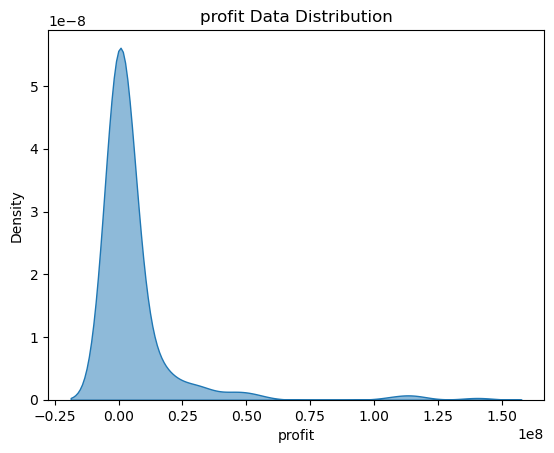

In [48]:
sns.kdeplot(data= low_budget_movies, x='profit',fill=True,alpha=.5)
plt.xlabel('profit')
plt.title('profit Data Distribution')
plt.show()

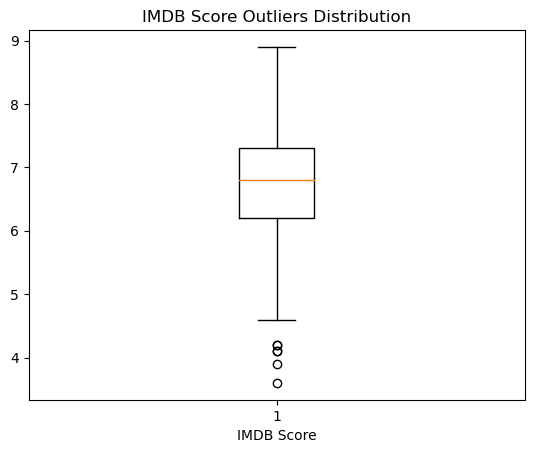

In [49]:
plt.boxplot(x = 'imdb_score', data = low_budget_movies)
plt.xlabel('IMDB Score')
plt.title('IMDB Score Outliers Distribution')
plt.show()

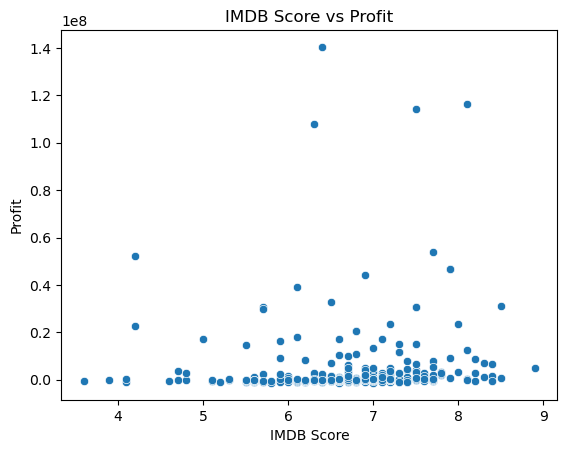

In [50]:
sns.scatterplot(data=low_budget_movies, x='imdb_score', y='profit')
plt.xlabel('IMDB Score')
plt.ylabel('Profit')
plt.title('IMDB Score vs Profit')
plt.show()

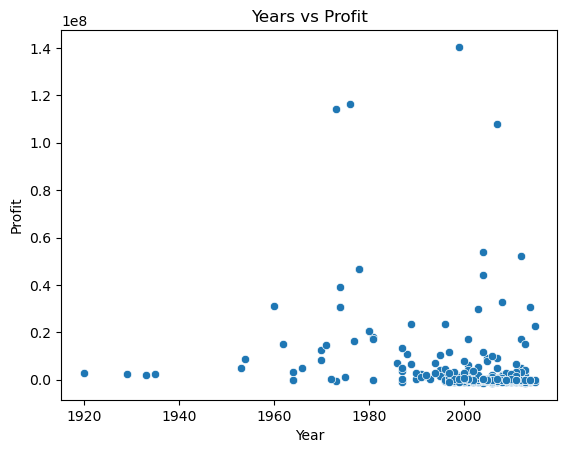

In [51]:
sns.scatterplot(data=low_budget_movies, x='title_year', y='profit')
plt.xlabel('Year')
plt.ylabel('Profit')
plt.title('Years vs Profit')
plt.show()

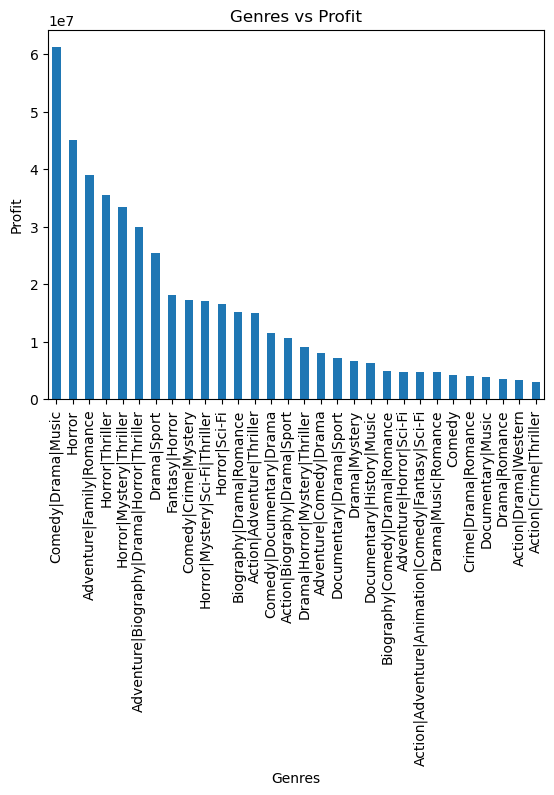

In [52]:
genre = low_budget_movies.groupby('genres')['profit'].mean().sort_values(ascending=False).head(30)
genre.plot(kind = 'bar')
plt.xlabel('Genres')
plt.ylabel('Profit')
plt.title('Genres vs Profit')
plt.show()


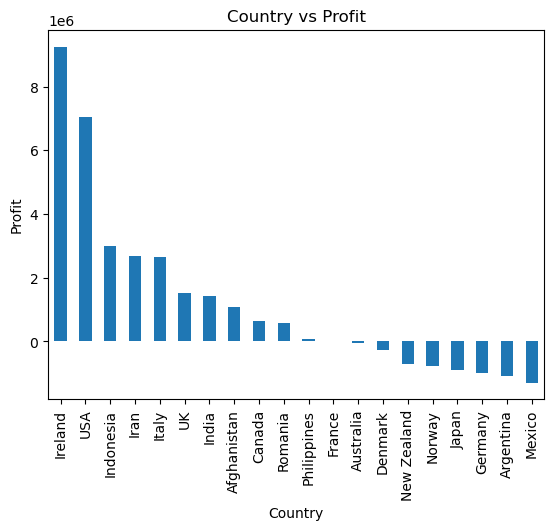

In [53]:
country = low_budget_movies.groupby('country')['profit'].mean().sort_values(ascending=False).head(30)
country.plot(kind = 'bar')
plt.xlabel('Country')
plt.ylabel('Profit')
plt.title('Country vs Profit')
plt.show()

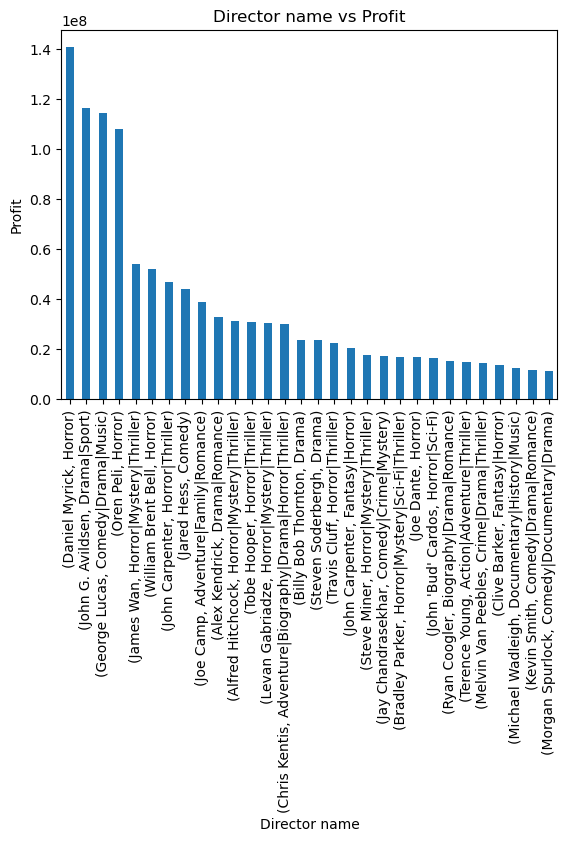

In [54]:
direct = low_budget_movies.groupby(['director_name','genres'])['profit'].mean().sort_values(ascending=False).head(30)
direct.plot(kind = 'bar')
plt.xlabel('Director name')
plt.ylabel('Profit')
plt.title('Director name vs Profit')
plt.show()

+ I have plotted some of the charts with the relationship between profit and features. At my observations:

+ The movie that has a > 6.5 IMDb score has more profit.
+ The movies that came out in the latest years with good content had a huge profit.
+ In genres 'Comedy|Drama|Music', 'Horror','Adventure|Family|Romance', 'Horror|Thriller' have huge box office collections.
+ Within the production budget (<= £1,500,000), the best directors who produce more profits are : 'Daniel Myrick', 'John G. Avildsen', 'George Lucas', 'James Wan'.


In [55]:
low_budget_movies.columns

Index(['budget_level', 'duration', 'genres', 'language', 'budget', 'profit',
       'imdb_score', 'title_year', 'country', 'content_rating',
       'director_name'],
      dtype='object')

In [56]:
movie_cont_data = low_budget_movies[['duration','profit', 'imdb_score', 'title_year','budget']]

<Axes: >

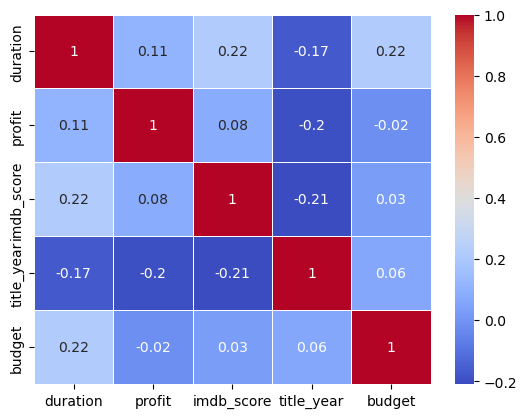

In [57]:
movie_cont_data_corr= movie_cont_data.corr().round(2)
sns.heatmap(data = movie_cont_data_corr, annot = True,cmap='coolwarm', linewidths=.5)

In [58]:
director1 = movie_clean_data[movie_clean_data['director_name'] == 'Daniel Myrick']
director1

,budget_level,duration,genres,language,budget,profit,imdb_score,title_year,country,content_rating,director_name
4707,Lower,81.0,Horror,English,60000.0,140470114.0,6.4,1999,USA,R,Daniel Myrick


In [59]:
director2 = movie_clean_data[movie_clean_data['director_name'] == 'John G. Avildsen']
director2

,budget_level,duration,genres,language,budget,profit,imdb_score,title_year,country,content_rating,director_name
1184,Higher,126.0,Action|Drama|Family|Sport,English,8000000.0,82800000.0,7.2,1984,USA,PG,John G. Avildsen
3351,Higher,126.0,Action|Drama|Family|Sport,English,8000000.0,82800000.0,7.2,1984,USA,PG,John G. Avildsen
4530,Lower,145.0,Drama|Sport,English,960000.0,116275247.0,8.1,1976,USA,PG,John G. Avildsen


In [60]:
director3 = movie_clean_data[movie_clean_data['director_name'] == 'George Lucas']
director3

,budget_level,duration,genres,language,budget,profit,imdb_score,title_year,country,content_rating,director_name
236,Higher,140.0,Action|Adventure|Fantasy|Sci-Fi,English,113000000.0,267262555.0,7.6,2005,USA,PG-13,George Lucas
237,Higher,142.0,Action|Adventure|Fantasy|Sci-Fi,English,115000000.0,195675583.0,6.7,2002,USA,PG,George Lucas
240,Higher,136.0,Action|Adventure|Fantasy|Sci-Fi,English,115000000.0,359544677.0,6.5,1999,USA,PG,George Lucas
3024,Higher,125.0,Action|Adventure|Fantasy|Sci-Fi,English,11000000.0,449935665.0,8.7,1977,USA,PG,George Lucas
4674,Lower,112.0,Comedy|Drama|Music,English,777000.0,114223000.0,7.5,1973,USA,PG,George Lucas


In [61]:
director4 = movie_clean_data[movie_clean_data['director_name'] == 'Oren Peli']
director4

,budget_level,duration,genres,language,budget,profit,imdb_score,title_year,country,content_rating,director_name
4793,Lower,84.0,Horror,English,15000.0,107902283.0,6.3,2007,USA,R,Oren Peli


In [62]:
director5 = movie_clean_data[movie_clean_data['director_name'] == 'James Wan']
director5

,budget_level,duration,genres,language,budget,profit,imdb_score,title_year,country,content_rating,director_name
45,Higher,140.0,Action|Crime|Thriller,English,190000000.0,160034110.0,7.2,2015,USA,PG-13,James Wan
1196,Higher,134.0,Horror|Mystery|Thriller,English,40000000.0,62310175.0,7.8,2016,USA,R,James Wan
2163,Higher,112.0,Horror|Mystery|Thriller,English,20000000.0,117387272.0,7.5,2013,USA,R,James Wan
2293,Higher,111.0,Action|Crime|Thriller,English,20000000.0,-10474724.0,6.8,2007,USA,R,James Wan
3696,Higher,106.0,Fantasy|Horror|Thriller,English,5000000.0,78574831.0,6.6,2013,USA,PG-13,James Wan
4413,Higher,103.0,Fantasy|Horror|Mystery|Thriller,English,1500000.0,52491137.0,6.8,2010,USA,PG-13,James Wan
4485,Lower,103.0,Horror|Mystery|Thriller,English,1200000.0,53953403.0,7.7,2004,USA,R,James Wan


In [63]:
director6 = movie_clean_data[movie_clean_data['director_name'] == 'William Brent Bell']
director6

,budget_level,duration,genres,language,budget,profit,imdb_score,title_year,country,content_rating,director_name
2231,Higher,75.0,Horror|Thriller,English,9000000.0,14078294.0,5.1,2006,USA,PG-13,William Brent Bell
3112,Higher,97.0,Horror|Mystery|Thriller,English,10000000.0,25794166.0,6.0,2016,USA,PG-13,William Brent Bell
4545,Lower,83.0,Horror,English,1000000.0,52245055.0,4.2,2012,USA,R,William Brent Bell


# EXPLORATORY DATA ANALYSIS (ON WHOLE DATA)

+ This analysis was done on the whole data to compare the results that we got in the EDA Part 1.

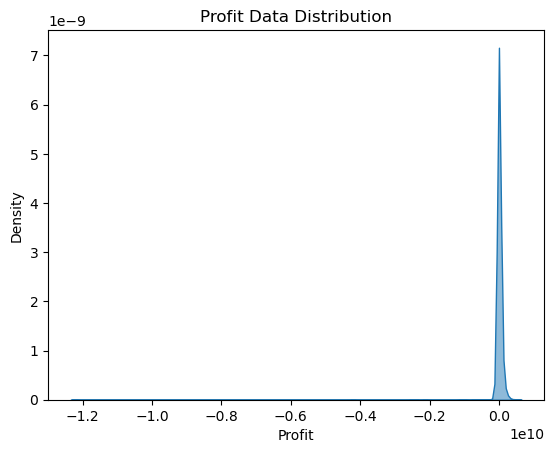

In [64]:
sns.kdeplot(data= movie_clean_data, x='profit',fill=True,alpha=.5)
plt.xlabel('Profit')
plt.title('Profit Data Distribution')
plt.show()

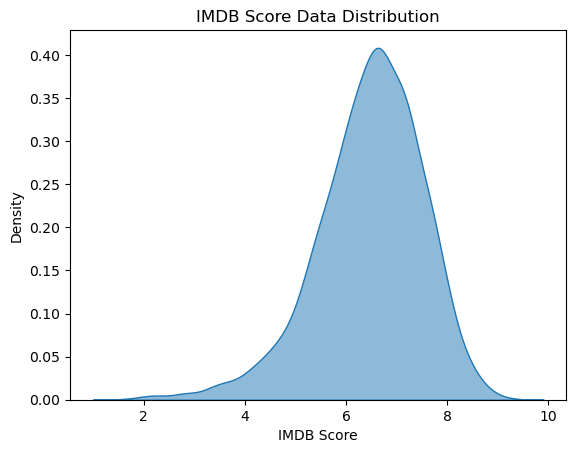

In [65]:
sns.kdeplot(data= movie_clean_data, x='imdb_score',fill=True,alpha=.5)
plt.xlabel('IMDB Score')
plt.title('IMDB Score Data Distribution')
plt.show()

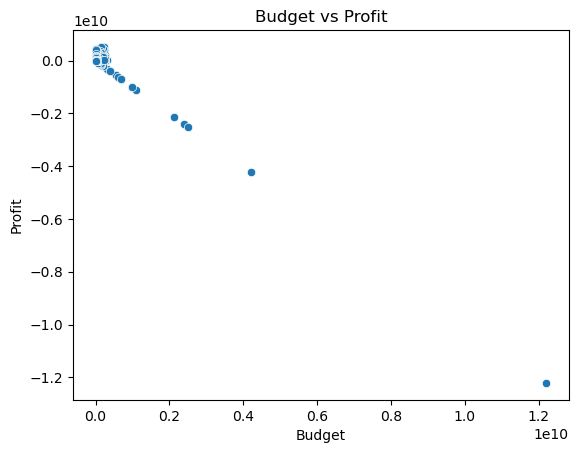

In [66]:
sns.scatterplot(data=movie_clean_data, x='budget', y='profit')
plt.xlabel('Budget')
plt.ylabel('Profit')
plt.title('Budget vs Profit')
plt.show()

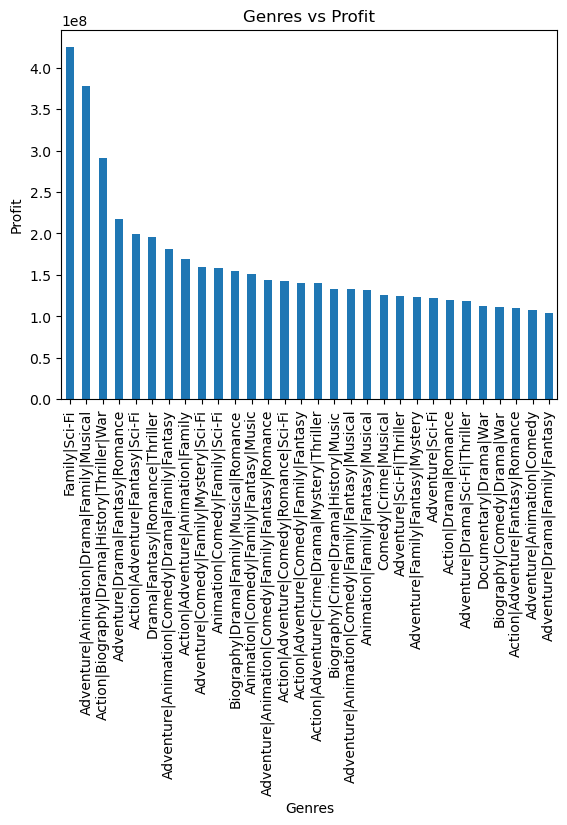

In [67]:
directr = movie_clean_data.groupby('genres')['profit'].mean().sort_values(ascending=False).head(30)
directr.plot(kind = 'bar')
plt.xlabel('Genres')
plt.ylabel('Profit')
plt.title('Genres vs Profit')
plt.show()

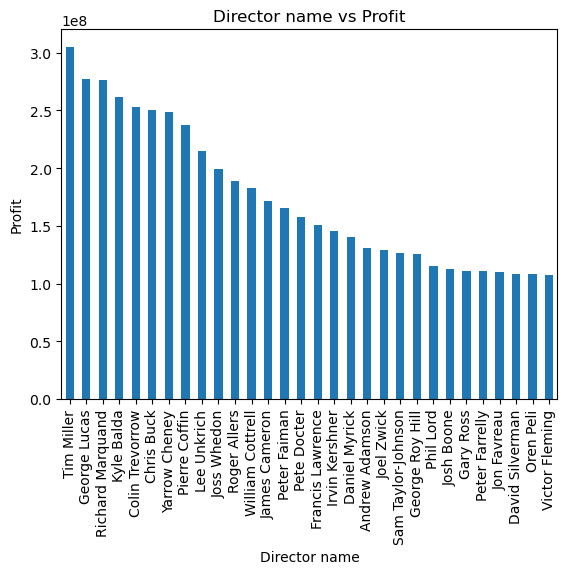

In [68]:
directr = movie_clean_data.groupby('director_name')['profit'].mean().sort_values(ascending=False).head(30)
directr.plot(kind = 'bar')
plt.xlabel('Director name')
plt.ylabel('Profit')
plt.title('Director name vs Profit')
plt.show()

<Axes: >

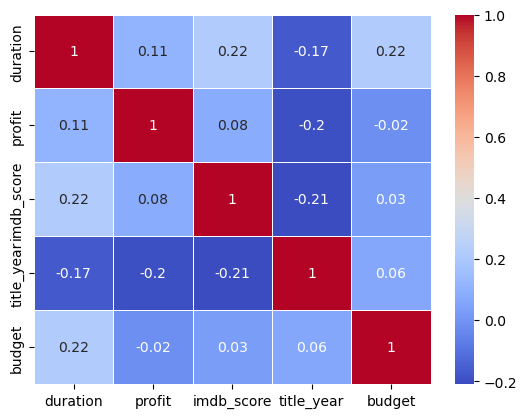

In [69]:
movie_cont_data_cor= movie_cont_data.corr().round(2)
sns.heatmap(data = movie_cont_data_cor, annot = True,cmap='coolwarm', linewidths=.5)

In [70]:
directr1 = movie_clean_data[movie_clean_data['director_name']=='Tim Miller']
directr1

,budget_level,duration,genres,language,budget,profit,imdb_score,title_year,country,content_rating,director_name
812,Higher,108.0,Action|Adventure|Comedy|Romance|Sci-Fi,English,58000000.0,305024263.0,8.1,2016,USA,R,Tim Miller


In [71]:
directr2 = movie_clean_data[movie_clean_data['director_name']=='Daniel Myrick']
directr2

,budget_level,duration,genres,language,budget,profit,imdb_score,title_year,country,content_rating,director_name
4707,Lower,81.0,Horror,English,60000.0,140470114.0,6.4,1999,USA,R,Daniel Myrick


+ This analysis shows the same result as EDA Part 1, so there is not much difference in the results. So, we can recommend the insights that were gained by EDA Part 1.

+ However, we must conduct Hypothesis testing to determine whether the higher profit shown by the Horror|Mystery|Thriller film is statistically significant.

# Hypothesis Testing

### Assumption 1:-

If Horror|Mystery|Thriller movies make higher profit, then average profit will be grater for Horror|Mystery|Thriller movies.

* $H_0$ : Average profit for Horror|Mystery|Thriller movies are same as average of other genres
  $U_1$ - $U_2$ = $0$

* $H_1$ : Average profit for Horror|Mystery|Thriller movies are greater than average of other genre $U_1$ - $U_2$ > $0$

Here the two groups for which we do the hypothesis testing is for hmt0['profit'] and hmt1['profit']


In [72]:
hmt0 = movie_clean_data[movie_clean_data['genres'] != 'Horror|Mystery|Thriller']
hmt1 = movie_clean_data[movie_clean_data['genres'] == 'Horror|Mystery|Thriller']

print('The mean profit of other genres  = {}'.format(np.mean(hmt0['profit'])))
print('The mean profit of Horror genre = {}'.format(np.mean(hmt1['profit'])))

The mean profit of other genres  = 5612228.96802935
The mean profit of Horror genre = 22327037.967741936


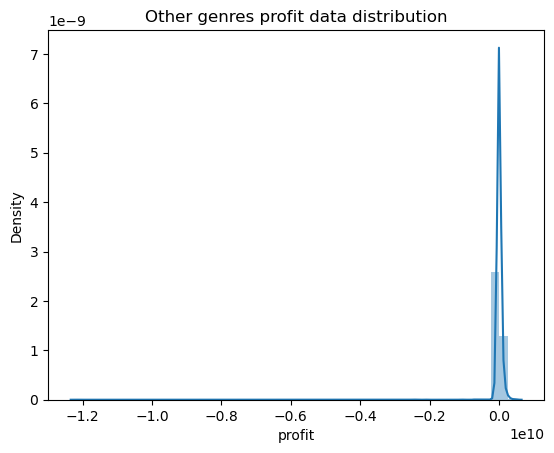

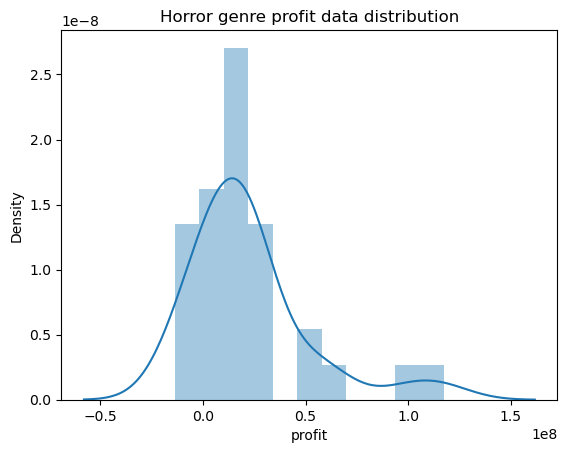

In [73]:
sns.distplot(hmt0['profit'])
plt.title('Other genres profit data distribution')
plt.show()

sns.distplot(hmt1['profit'])
plt.title('Horror genre profit data distribution')
plt.show()

In [74]:
hmt0.shape

(3816, 11)

In [75]:
hmt1.shape

(31, 11)

+ We will use the t-test because the sample size is insufficient for a z-test. Also, because the sample sizes of the two groups are different, we cannot assume the same variance (i.e., we cannot use the student's t-test). The Welch's t-test will be used.

In [76]:
def perform_hypothesis_testing(val1, val2):
    alpha = [0.01,0.05,0.1]
    stat ,p_value = ttest_ind(val1, val2, equal_var = False)
    print(p_value/2)#since we are doing single tail test, we need only p_value/2
    
    for i in alpha:
        if p_value/2 < i:
            print('Reject the Null Hypothesis H0 at {} % significance level'. format(i*100))
            break
        else:
            print('Failed to reject the Null Hypothesis H0 at {} % significance level'.format(i*100))

In [77]:
perform_hypothesis_testing(hmt0['profit'], hmt1['profit'])

0.005748776100782672
Reject the Null Hypothesis H0 at 1.0 % significance level


+ Based on the above hypothesis testing, we can conclude that making a movie in the Horror|Mystery|Thriller genre can yield a higher profit than the average of other movie genres at a confidence interval of 99%.

### Assumption 2:-

If James Wan movies make higher profit, then average profit will be grater for James wan movies.

* $H_0$ : Average profit for James wan movies are same as average of others
  $U_1$ - $U_2$ = $0$

* $H_1$ : Average profit for James wan movies are greater than average of others $U_1$ - $U_2$ > $0$

Here the two groups for which we do the hypothesis testing is for director0['profit'] and director1['profit']

In [78]:
director0 = movie_clean_data[movie_clean_data['director_name'] != 'James Wan']
director1 = movie_clean_data[movie_clean_data['director_name'] == 'James Wan']

print('The mean profit of others  = {}'.format(np.mean(director0['profit'])))
print('The mean profit of James Wan = {}'.format(np.mean(director1['profit'])))

The mean profit of others  = 5623470.759114583
The mean profit of James Wan = 73468029.14285715


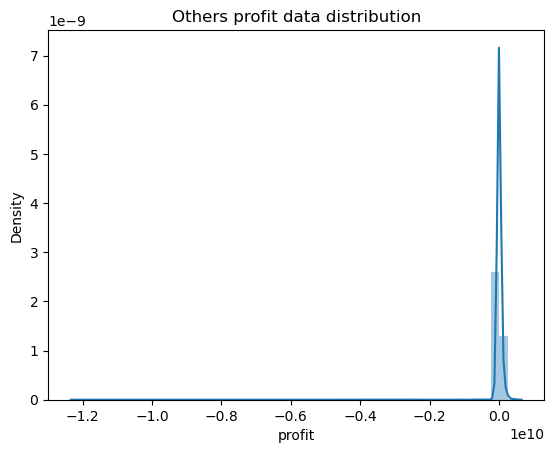

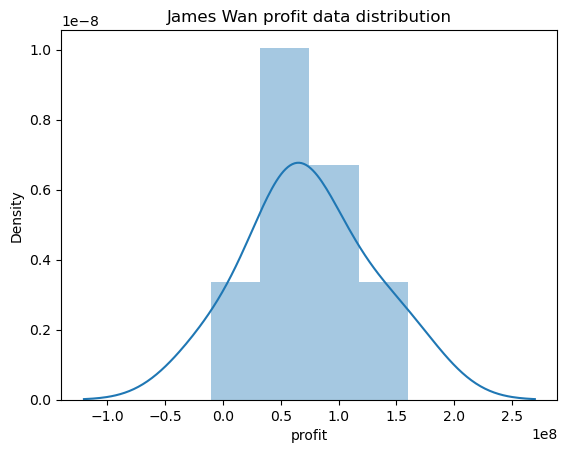

In [79]:
sns.distplot(director0['profit'])
plt.title('Others profit data distribution')
plt.show()

sns.distplot(director1['profit'])
plt.title('James Wan profit data distribution')
plt.show()

In [80]:
def perform_hypothesis_testing(val1, val2):
    alpha = [0.01,0.05,0.1]
    stat ,p_value = ttest_ind(val1, val2, equal_var = False)
    print(p_value/2)#since we are doing single tail test, we need only p_value/2
    
    for i in alpha:
        if p_value/2 < i:
            print('Reject the Null Hypothesis H0 at {} % significance level'. format(i*100))
            break
        else:
            print('Failed to reject the Null Hypothesis H0 at {} % significance level'.format(i*100))

In [81]:
perform_hypothesis_testing(director0['profit'], director1['profit'])

0.007704683969147549
Reject the Null Hypothesis H0 at 1.0 % significance level


Based on the above hypothesis testing, we can conclude that making a movie of James Wan director can yield a higher profit than the average of others a confidence interval of 99%.

# Summary 

+ As per the above tasks include the data collection , data understanding, data cleaning, data preparation and exploratory data analysis some of the recommendations I can make strongly that.

+ In my personal choice, I'm going with the director name 'James Wan' because his previous records are so good. He is more specialized in making films in the genre of 'Horror, Mystery, and Thriller', and this genre also ranks in the top 5 at the box office collections.

+ In the past 10 years, he has filmed three movies related to 'Horror, Mystery, and Thriller'. He bagged a huge profit with an average IMDb score of > 7.5, and with the low budget, he also released a film in 2004. The movie was a success at the box office, with a profit of £53953403.0.

+ So, the director is going with the latest trend and has a high success rate in the 'Horror|Mystery|Thriller' genre. and he is more experienced in that particular genre.

+ Finally, hypothesis testing was completed, and I determined that I could propose the Horror|Mystery|Thriller film genre with a 99% confidence interval.

In [1]:
filepath="Movie Genres Recommendation.ipynb"

In [2]:
import io
from nbformat import read
with io.open(filepath, "r", encoding="utf-8") as f:
    nb=read(f, 4)
word_count = 0
for cell in nb["cells"]:
    if cell.cell_type == "markdown":
        word_count += len(cell["source"].replace("#", "").lstrip().split(" "))
print(f"Submission length is {word_count}")

Submission length is 920
